## LSTM

This notebook is meant to set up an LSTM for predicting load.

In [1]:
#!/usr/bin/env python
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from lstm import LSTM

In [2]:
data = pd.read_csv("./data/data_oct20.csv", parse_dates = ["date"])
data = data.iloc[::10]
data.head(2)

,L2_react,L2,L,L_react,NS4949_export,L2_active_import,PV,Wind_speed,Temperature,Global_irradiance,Plane_irradiance,Module_temp,Bat_current,Bat_energy,Battery_SOC,Battery_voltage,Battery_charge,Battery_discharge,date,L1
0,-1.672253,8.917166,105.823796,-1.330095,103.75,7.500,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:00:00,96.906629
10,-1.528216,6.749649,99.311711,1.809572,115.00,5.625,0.037092,3.0,13.221428,0.179641,0.180723,0.001712,-0.714286,761.702393,69.599998,751.555542,0.000416,0.000313,2020-10-01 01:10:00,92.562062


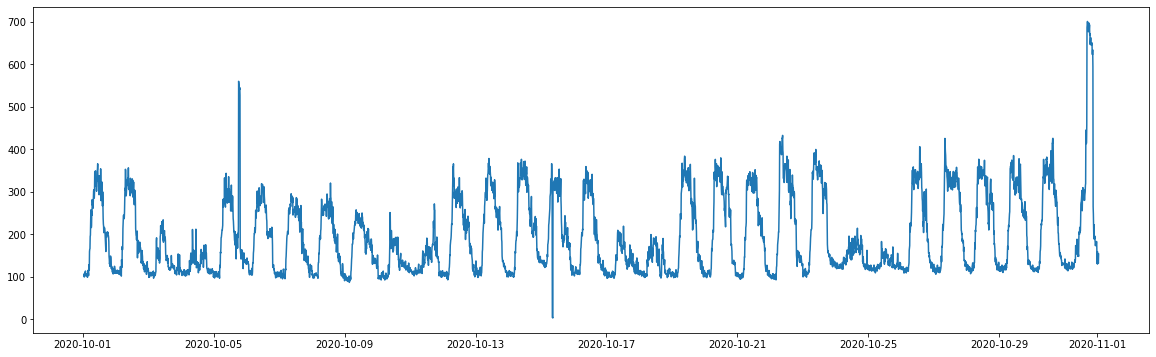

In [5]:
plt.figure(figsize = (20, 6))
plt.plot(data.date, data.L)
plt.show()

In [89]:
lstm = LSTM("./data/data_oct20.csv", "L", ["Temperature"], 6, 12, lstm_nodes= 100, sample_rate = 15, clean = 10)

Prepared data with the following variables: ['L', 'Temperature']
Shape of train set (2380, 6, 2), shape of test set (579, 6, 2).

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_19 (Dense)             (None, 24)                2424      
Total params: 43,624
Trainable params: 43,624
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
38/38 - 2s - loss: 0.9207 - val_loss: 0.0421
Epoch 2/100
38/38 - 0s - loss: 0.0342 - val_loss: 0.0271
Epoch 3/100
38/38 - 0s - loss: 0.0397 - val_loss: 0.0304
Epoch 4/100
38/38 - 0s - loss: 0.0515 - val_loss: 0.0351
Epoch 5/100
38/38 - 0s - loss: 0.0588 - val_loss: 0.0410
Epoch 6/100
38/38 - 0s - loss: 0.0616 - val_loss: 0.0418
Epoch 7/100
38/38 - 0s - loss: 0.0620 - val_loss: 0.0424

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
Epoch 8/100
38/38 - 0s - loss: 0.0601 - val_loss: 0.0278
Epoch 9/100
38/38 - 0s - loss: 0.0446 - val_loss: 0.0278
Epoch 10/100
38/38 - 0s - loss: 0.0458 - val_loss: 0.0282
Epoch 11/100
38/38 - 0s - loss: 0.0469 - val_loss: 0.0284
Epoch 12/100
38/38 - 0s - loss: 0.0473 - val_loss: 0.0288

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.02500000037252903.
Epoch 13/100
38/38 - 0s - loss: 0.0443 - val_loss: 0.0275
Epoch 14/100
38/38 - 0s - loss: 0.0340 - val_loss: 0.0268
Epoch 15/100
38/38 - 0s - loss: 0.0364 

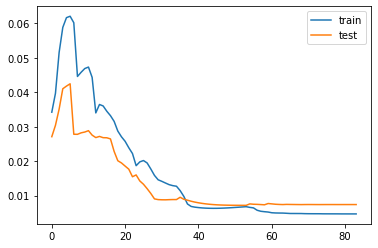

In [90]:
lstm.train_model(epochs = 100, verbose = 2)
lstm.plot_training_history()

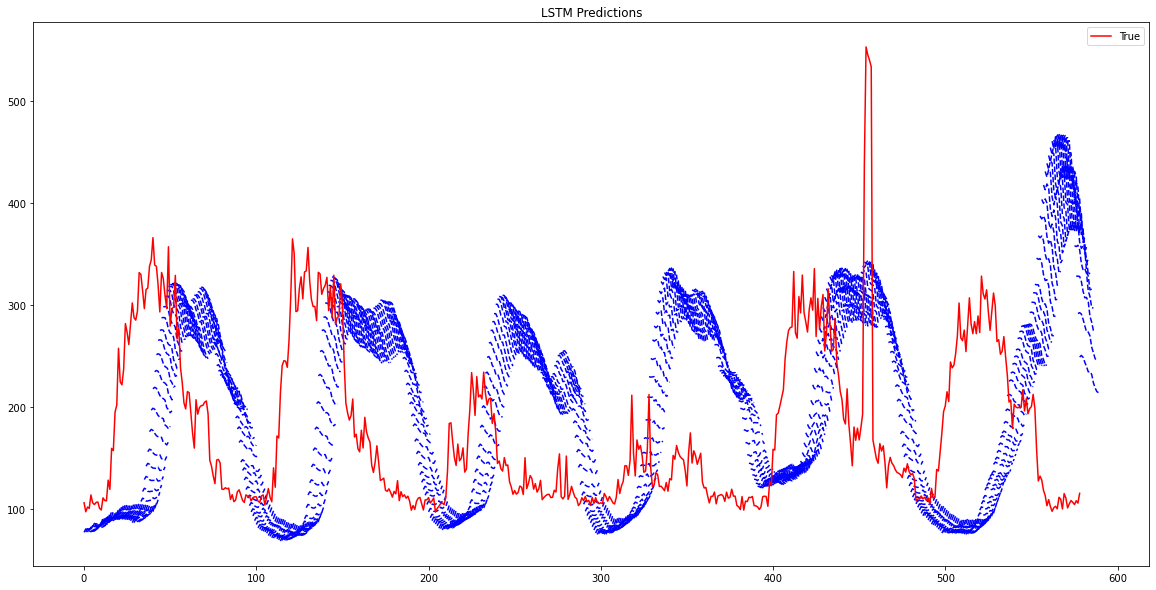

In [91]:
yhat = lstm.predict_on_test_set()
lstm.plot_test_set(yhat, 1000, plot_every=1)


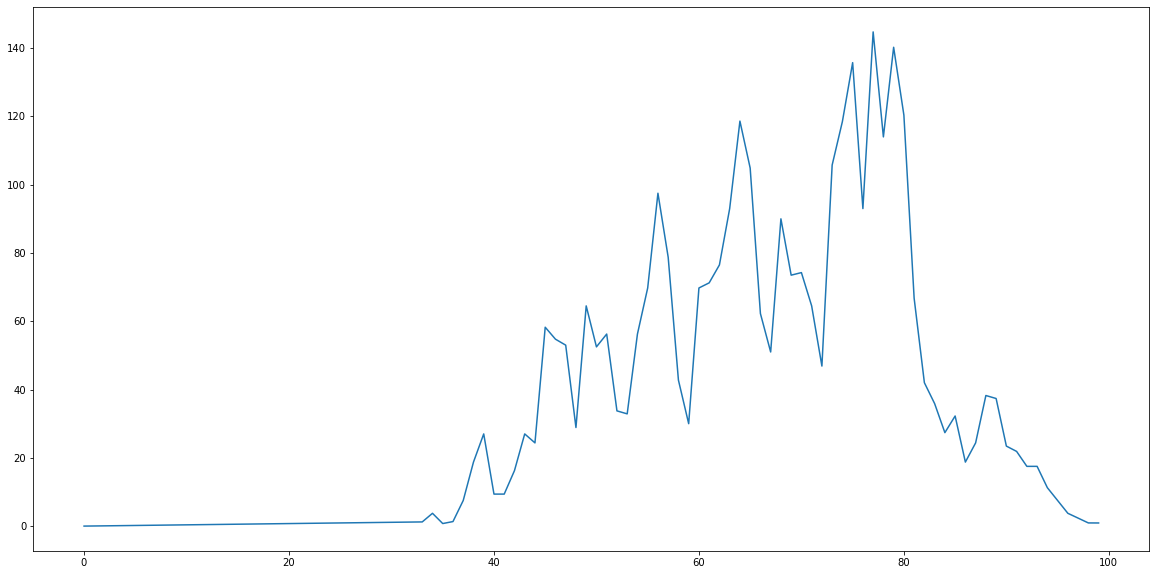

In [58]:
plt.figure(figsize=(20,10))
plt.plot(range(100), data["PV"][:100])

In [898]:
yhat.shape

(8909, 15)